In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import silhouette_score as sils

In [2]:
cos1 = pd.read_csv("Mall_Customers.csv")

In [3]:
cos1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


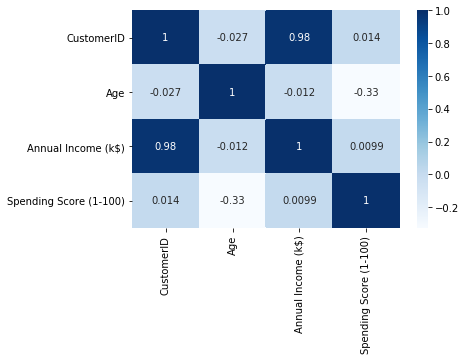

In [27]:
sns.heatmap(cos1.corr(),annot=True,cmap="Blues")
plt.show()

In [4]:
cos1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#cos1['Gender']= cos1.Gender.apply(lambda x:
#                        "1" if x == "Male"
 #                       else "2")
cos1 = pd.get_dummies(cos1)

In [6]:
cos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Gender_Female           200 non-null    uint8
 5   Gender_Male             200 non-null    uint8
dtypes: int64(4), uint8(2)
memory usage: 6.8 KB


In [7]:
 #cos1["Gender"] = pd.to_numeric(cos1["Gender"])

In [8]:
cos1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [9]:
cos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Gender_Female           200 non-null    uint8
 5   Gender_Male             200 non-null    uint8
dtypes: int64(4), uint8(2)
memory usage: 6.8 KB


In [10]:
cos = cos1.drop(columns=['CustomerID'])

In [11]:
cos

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [12]:
X = cos.values
X




array([[ 19,  15,  39,   0,   1],
       [ 21,  15,  81,   0,   1],
       [ 20,  16,   6,   1,   0],
       [ 23,  16,  77,   1,   0],
       [ 31,  17,  40,   1,   0],
       [ 22,  17,  76,   1,   0],
       [ 35,  18,   6,   1,   0],
       [ 23,  18,  94,   1,   0],
       [ 64,  19,   3,   0,   1],
       [ 30,  19,  72,   1,   0],
       [ 67,  19,  14,   0,   1],
       [ 35,  19,  99,   1,   0],
       [ 58,  20,  15,   1,   0],
       [ 24,  20,  77,   1,   0],
       [ 37,  20,  13,   0,   1],
       [ 22,  20,  79,   0,   1],
       [ 35,  21,  35,   1,   0],
       [ 20,  21,  66,   0,   1],
       [ 52,  23,  29,   0,   1],
       [ 35,  23,  98,   1,   0],
       [ 35,  24,  35,   0,   1],
       [ 25,  24,  73,   0,   1],
       [ 46,  25,   5,   1,   0],
       [ 31,  25,  73,   0,   1],
       [ 54,  28,  14,   1,   0],
       [ 29,  28,  82,   0,   1],
       [ 45,  28,  32,   1,   0],
       [ 35,  28,  61,   0,   1],
       [ 40,  29,  31,   1,   0],
       [ 23,  

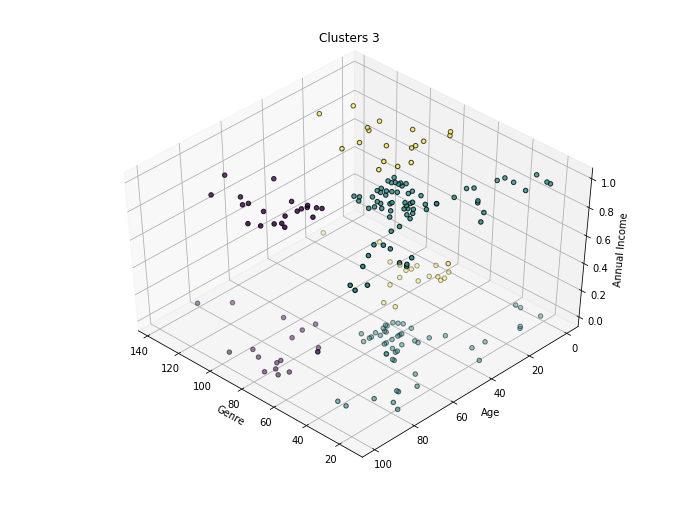

In [16]:
est = KMeans(n_clusters=3, n_init=10,init='random')
fig = plt.figure(1, figsize=(10, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
est.fit(X)

ax.scatter(X[:,1], X[:,2], X[:,3],
c=est.labels_.astype(np.float), edgecolor='k')
#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Genre')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income')
ax.set_title("Clusters 3")
ax.dist = 12

In [166]:
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(cos)
        distortions.append(kmeanModel.inertia_)

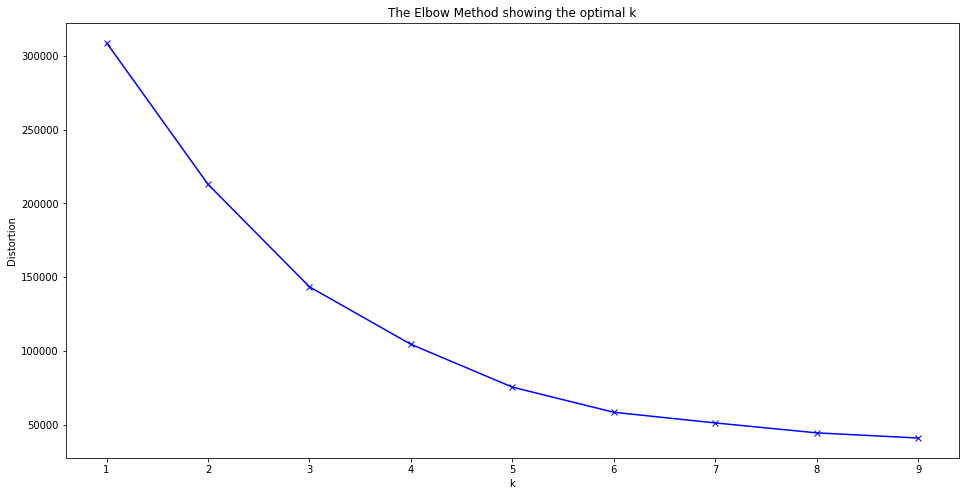

In [167]:
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [160]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=5).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.4440669204743008
For n_clusters=3, The Silhouette Coefficient is 0.4440669204743008
For n_clusters=4, The Silhouette Coefficient is 0.4440669204743008
For n_clusters=5, The Silhouette Coefficient is 0.4440669204743008
For n_clusters=6, The Silhouette Coefficient is 0.44424291275274114
For n_clusters=7, The Silhouette Coefficient is 0.44482259384548795
For n_clusters=8, The Silhouette Coefficient is 0.44482259384548795
For n_clusters=9, The Silhouette Coefficient is 0.4440669204743008
For n_clusters=10, The Silhouette Coefficient is 0.4440669204743008


In [163]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters= n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.29307334005502633
For n_clusters=3, The Silhouette Coefficient is 0.383798873822341
For n_clusters=4, The Silhouette Coefficient is 0.4052954330641215
For n_clusters=5, The Silhouette Coefficient is 0.4402372958247734
For n_clusters=6, The Silhouette Coefficient is 0.45206493204632353
For n_clusters=7, The Silhouette Coefficient is 0.4409411333609709
For n_clusters=8, The Silhouette Coefficient is 0.4277721345758326
For n_clusters=9, The Silhouette Coefficient is 0.41399380962999754
For n_clusters=10, The Silhouette Coefficient is 0.38655420560605847


In [16]:
   # cos['k_means']=kmeanModel.predict(X)
   # fig, axes = plt.subplots(1, 2, figsize=(16,8))
   # axes[0].scatter(cos[0], cos[1], c=cos['Genre'])
   # axes[1].scatter(cos[0], cos[1], c=cos['k_means'], cmap=plt.cm.Set1)
   # axes[0].set_title('Actual', fontsize=18)
   # axes[1].set_title('K_Means', fontsize=18)

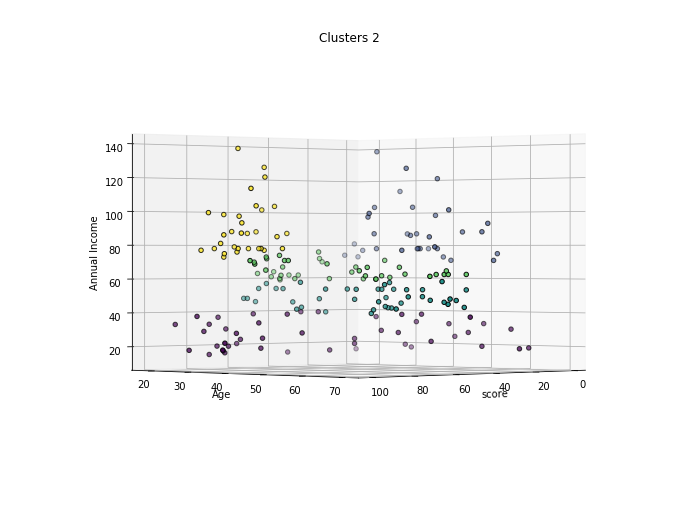

In [57]:
est = KMeans(n_clusters=5, n_init=1)
fig = plt.figure(1, figsize=(10, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=45)
est.fit(X)

ax.scatter(X[:,4], X[:,2], X[:,3],
c=est.labels_.astype(np.float), edgecolor='k')
ax.set_xlabel('score')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income')
ax.set_title("Clusters 2")
ax.dist = 12

In [58]:
#L'algorithme BIRCH est plus adapté au cas où la quantité de données est grande 
#et le nombre de catégories K est relativement grand. Il s'exécute très rapidement 
#et n'a besoin que d'un seul passage pour analyser l'ensemble de données pour le clustering. 
#Bien sûr, certaines compétences sont nécessaires. Ci-dessous, nous résumerons l'algorithme BIRCH.
from sklearn.cluster import Birch
brc = Birch(n_clusters=5)
brc.fit(X)
brc.predict(X)

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

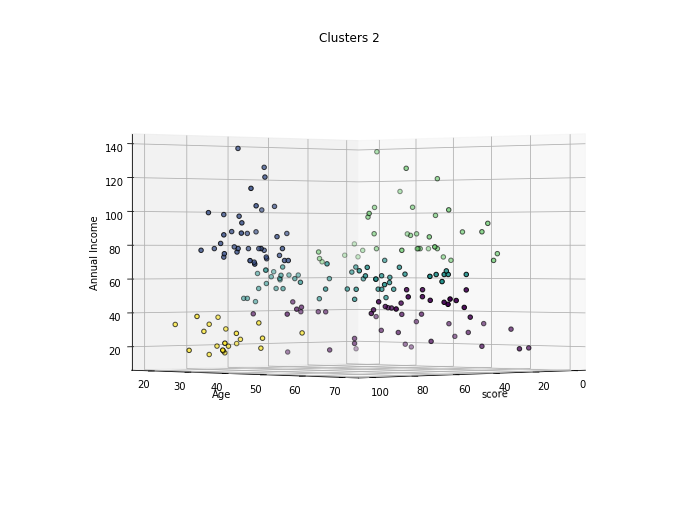

In [59]:
fig = plt.figure(1, figsize=(10, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=45)
brc.predict(X)

ax.scatter(X[:,4], X[:,2], X[:,3],
c=brc.labels_.astype(np.float), edgecolor='k')
ax.set_xlabel('score')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income')
ax.set_title("Clusters 2")
ax.dist = 12

In [20]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth=2).fit(X)
clustering.labels_
clustering.predict([[0, 0], [5, 5]])
clustering
MeanShift(bandwidth=2)



ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 5

In [21]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [22]:
X

array([[  1,   1,  19,  15,  39],
       [  2,   1,  21,  15,  81],
       [  3,   2,  20,  16,   6],
       [  4,   2,  23,  16,  77],
       [  5,   2,  31,  17,  40],
       [  6,   2,  22,  17,  76],
       [  7,   2,  35,  18,   6],
       [  8,   2,  23,  18,  94],
       [  9,   1,  64,  19,   3],
       [ 10,   2,  30,  19,  72],
       [ 11,   1,  67,  19,  14],
       [ 12,   2,  35,  19,  99],
       [ 13,   2,  58,  20,  15],
       [ 14,   2,  24,  20,  77],
       [ 15,   1,  37,  20,  13],
       [ 16,   1,  22,  20,  79],
       [ 17,   2,  35,  21,  35],
       [ 18,   1,  20,  21,  66],
       [ 19,   1,  52,  23,  29],
       [ 20,   2,  35,  23,  98],
       [ 21,   1,  35,  24,  35],
       [ 22,   1,  25,  24,  73],
       [ 23,   2,  46,  25,   5],
       [ 24,   1,  31,  25,  73],
       [ 25,   2,  54,  28,  14],
       [ 26,   1,  29,  28,  82],
       [ 27,   2,  45,  28,  32],
       [ 28,   1,  35,  28,  61],
       [ 29,   2,  40,  29,  31],
       [ 30,  

In [23]:
#np.random.seed(0)
#
## ============
## Generate datasets. We choose the size big enough to see the scalability
## of the algorithms, but not too big to avoid too long running times
## ============
#n_samples = 1500
#noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
#                                      noise=.05)
#noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
#blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
#no_structure = np.random.rand(n_samples, 2), None
#
## Anisotropicly distributed data
#random_state = 170
#X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
#transformation = [[0.6, -0.6], [-0.4, 0.8]]
#X_aniso = np.dot(X, transformation)
#aniso = (X_aniso, y)
#
## blobs with varied variances
#varied = datasets.make_blobs(n_samples=n_samples,
#                             cluster_std=[1.0, 2.5, 0.5],
#                             random_state=random_state)

In [24]:
noisy_circles

(array([[-0.67799938, -0.69875698],
        [ 0.93143746,  0.19139133],
        [ 0.54829131, -0.00601715],
        ...,
        [-0.34518816, -0.35804797],
        [ 0.01719727, -0.94513802],
        [ 0.91377877, -0.59884164]]),
 array([0, 0, 1, ..., 1, 0, 0], dtype=int64))

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


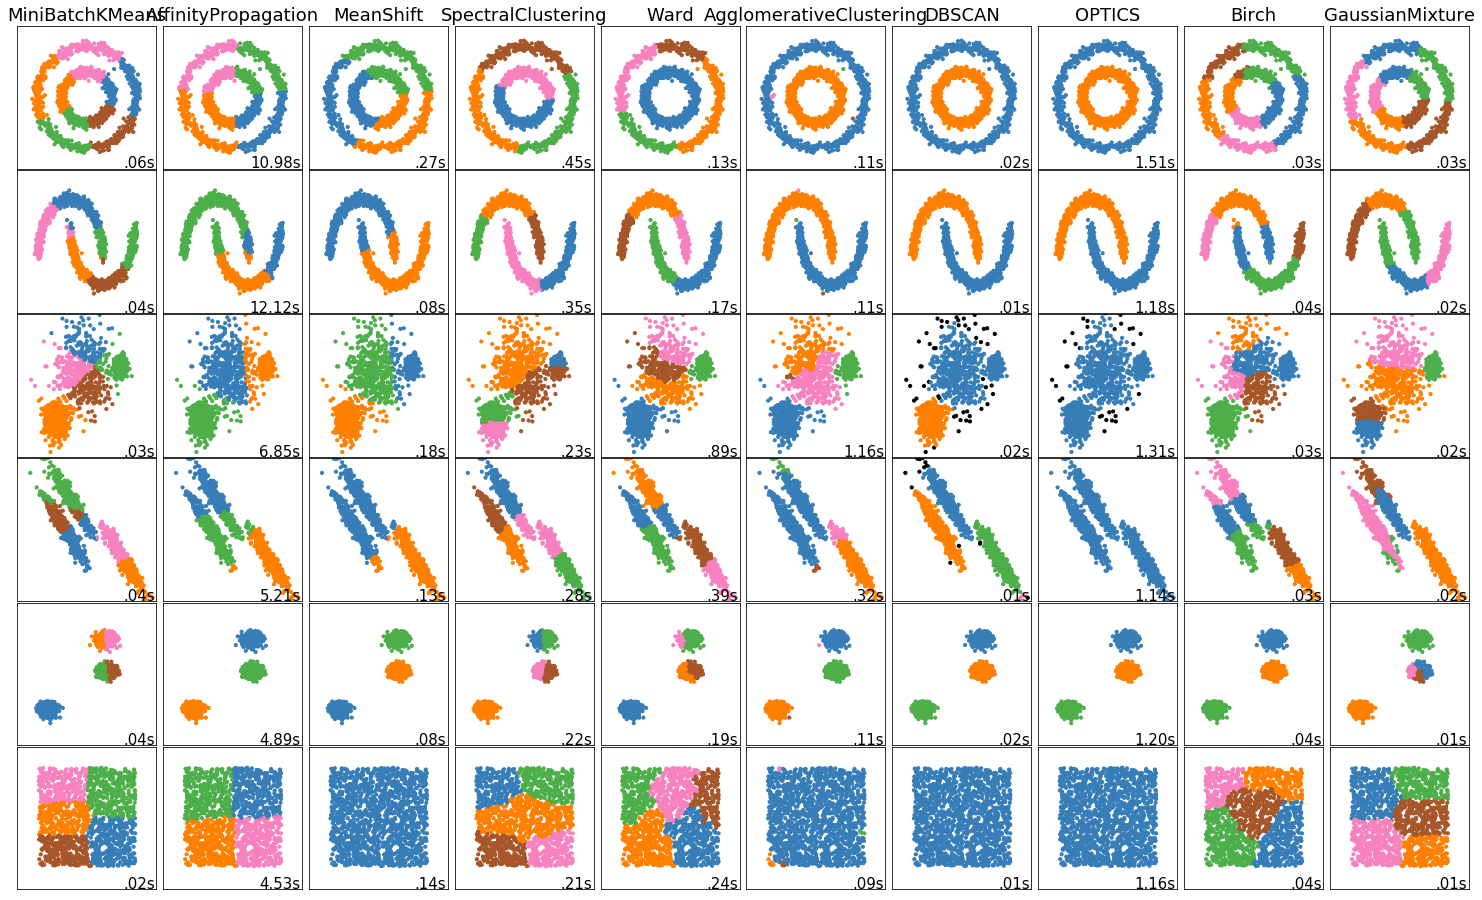

In [66]:




# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 5,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 5,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 5}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .5}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .5}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (cos, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = cos

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
 gmm = mixture.GaussianMixture(
        n_components=params['5'], covariance_type='full')

In [ ]:
  clustering_algorithms = ('GaussianMixture', gmm)

In [92]:
X

array([[  1,   1,  19,  15,  39],
       [  2,   1,  21,  15,  81],
       [  3,   2,  20,  16,   6],
       [  4,   2,  23,  16,  77],
       [  5,   2,  31,  17,  40],
       [  6,   2,  22,  17,  76],
       [  7,   2,  35,  18,   6],
       [  8,   2,  23,  18,  94],
       [  9,   1,  64,  19,   3],
       [ 10,   2,  30,  19,  72],
       [ 11,   1,  67,  19,  14],
       [ 12,   2,  35,  19,  99],
       [ 13,   2,  58,  20,  15],
       [ 14,   2,  24,  20,  77],
       [ 15,   1,  37,  20,  13],
       [ 16,   1,  22,  20,  79],
       [ 17,   2,  35,  21,  35],
       [ 18,   1,  20,  21,  66],
       [ 19,   1,  52,  23,  29],
       [ 20,   2,  35,  23,  98],
       [ 21,   1,  35,  24,  35],
       [ 22,   1,  25,  24,  73],
       [ 23,   2,  46,  25,   5],
       [ 24,   1,  31,  25,  73],
       [ 25,   2,  54,  28,  14],
       [ 26,   1,  29,  28,  82],
       [ 27,   2,  45,  28,  32],
       [ 28,   1,  35,  28,  61],
       [ 29,   2,  40,  29,  31],
       [ 30,  

In [19]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['GaussianMixture'] = labels

In [20]:
frame

,0,1,2,3,4,GaussianMixture
0,19,15,39,0,1,3
1,21,15,81,0,1,3
2,20,16,6,1,0,0
3,23,16,77,1,0,3
4,31,17,40,1,0,0
...,...,...,...,...,...,...
195,35,120,79,1,0,1
196,45,126,28,1,0,2
197,32,126,74,0,1,1
198,32,137,18,0,1,2


In [21]:
frame.GaussianMixture.value_counts().sort_values(ascending=True)

3    23
0    29
2    32
1    39
4    77
Name: GaussianMixture, dtype: int64

In [22]:
#frame.groupby(['cluster']).count()

In [23]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=5)
brc.fit(X)
brc.predict(X)
slp = pd.DataFrame(X)
slp['Birch'] = brc.predict(X)

In [24]:
slp

,0,1,2,3,4,Birch
0,19,15,39,0,1,4
1,21,15,81,0,1,3
2,20,16,6,1,0,4
3,23,16,77,1,0,3
4,31,17,40,1,0,4
...,...,...,...,...,...,...
195,35,120,79,1,0,2
196,45,126,28,1,0,1
197,32,126,74,0,1,2
198,32,137,18,0,1,1


In [25]:
slp.Birch.value_counts().sort_values(ascending=True)

3    20
4    23
1    38
2    39
0    80
Name: Birch, dtype: int64

In [26]:
frame.GaussianMixture.value_counts().sort_values(ascending=True)

3    23
0    29
2    32
1    39
4    77
Name: GaussianMixture, dtype: int64

In [27]:
enf = pd.DataFrame(columns=[frame['GaussianMixture'],slp['Birch']])
enf

Empty DataFrame
Columns: [(3, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 0), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (3, 3), (0, 4), (4, 0), (0, 4), (3, 0), (4, 0), (0, 0), (0, 0), (0, 0), (4, 0), (4, 0), (4, 0), (4, 0), (0, 0), (0, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (0, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), ...]
Index: []

[0 rows x 200 columns]

NameError: name 'dateset' is not defined

In [28]:
df_enf = pd.DataFrame(columns=[""]) 

In [29]:
df_enf['GaussianMixture'] = frame['GaussianMixture']

In [30]:
df_enf['Birch'] = slp['Birch']

In [31]:
df_enf.drop(columns=[''])

,GaussianMixture,Birch
0,3,4
1,3,3
2,0,4
3,3,3
4,0,4
...,...,...
195,1,2
196,2,1
197,1,2
198,2,1


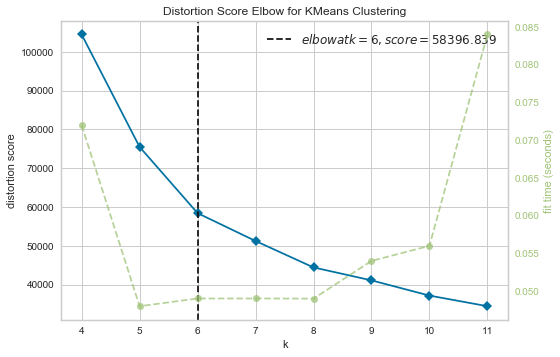

In [33]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [34]:
X2 = cos.iloc[:,1:]

In [55]:
X2

,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,15,39,0,1
1,15,81,0,1
2,16,6,1,0
3,16,77,1,0
4,17,40,1,0
...,...,...,...,...
195,120,79,1,0
196,126,28,1,0
197,126,74,0,1
198,137,18,0,1


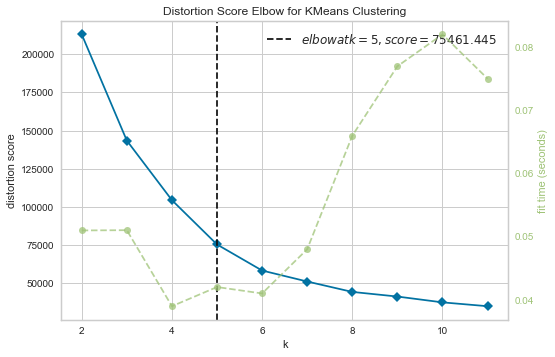

In [56]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(cos)
visualizer.show()

In [57]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(cos)
    label = kmeans.labels_
    sil_coeff = silhouette_score(cos, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.29298136996751367
For n_clusters=3, The Silhouette Coefficient is 0.38366377184202277
For n_clusters=4, The Silhouette Coefficient is 0.4051292479311983
For n_clusters=5, The Silhouette Coefficient is 0.44002319863526246
For n_clusters=6, The Silhouette Coefficient is 0.4517762870734356
For n_clusters=7, The Silhouette Coefficient is 0.44274888094212556
For n_clusters=8, The Silhouette Coefficient is 0.4291403620997067
For n_clusters=9, The Silhouette Coefficient is 0.4132895738870679
For n_clusters=10, The Silhouette Coefficient is 0.38021063220746776


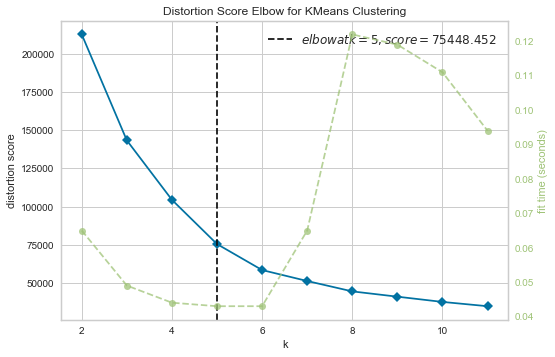

In [58]:
from yellowbrick.cluster import KElbowVisualizer

X2 = cos.iloc[:,1:]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(cos)
visualizer.show()

In [59]:
from sklearn.cluster import *
from sklearn.metrics import davies_bouldin_score as dbscore

ac = AgglomerativeClustering(n_clusters = 6).fit(cos) # on prépare le modèle
print("The silhouette coefficient for",ac.n_clusters_,"labels is :",sils(X2, labels=ac.labels_))
print("The Davies-Bouldin index for",ac.n_clusters_,"labels is :",dbscore(X2, labels=ac.labels_))

The silhouette coefficient for 6 labels is : 0.32388170657800314
The Davies-Bouldin index for 6 labels is : 6.382131058379781


In [ ]:
import scipy.integrate as integrate
import scipy

In [ ]:
# Distribution des tailles X.. (voir plus haut )
# X      = [159,158, 159, 179, 189 ..
# Générer un modèle aléatoire A 
A_mean = np.random.randint(100,300)
A_sd   = np.random.randint(10,30)

# Générer un modèle aléatoire B   
B_mean = np.random.randint(100,300)
B_sd   = np.random.randint(10,30)

# Faite 50 itérations... ( ca suffira)
for i in range(50):

    # Pour chaque valeur de X, calculer la probabilité 
    # sous l'hypothèse A et B
    p_A = scipy.stats.norm(loc=A_mean, scale=A_sd).pdf(cos)
    p_B = scipy.stats.norm(loc=B_mean, scale=B_sd).pdf(cos)

    # Calculer pour chaque valeur de X, un poids correspondant 
    # à son degrès d'appartenance à la loi A ou B.

    p_total  = p_A + p_B 
    weight_A = p_A / p_total
    weight_B = p_B / p_total

    # Exemple : Si la taille de 189cm appartient à la lois B 
    # alors weight_B(189) sera grand et weight_A(189) sera petit.

    #Ajustement des paramètres (μA,σA) et (μB,σB) en fonction du poids.

    A_mean = np.sum(cos * weight_A )/ np.sum(weight_A)
    B_mean = np.sum(cos * weight_B )/ np.sum(weight_B)

#A_sd   = np.sqrt(np.sum(weight_A * (X - A_mean)**2) / np.sum(weight_B_sd   = np.sqrt(np.sum(weight_B * (X - B_mean)**2) / np.sum(weight_B))

In [ ]:
sns.distplot(A_mean, label="mixture", color="green")
sns.distplot(B_mean, label="mixture", color="blue")
plt.legend()

In [60]:
from sklearn.cluster import MiniBatchKMeans


In [62]:
mini = MiniBatchKMeans(n_clusters=6)
mini.fit(cos)
mini.predict(cos)
df_mini = pd.DataFrame(cos)
df_mini['KmeanBatch'] = mini.predict(cos)

In [ ]:
df_mini